In [11]:
import mysite.polls.couleurs_convert as conv
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def creeIMG(ligne = 2 , colonne = 2):
    return np.random.randint(256,size =(3,ligne,colonne))

def affiche_histo(hist , titre = ''):
    if len(hist)> 1 :
        histo, bin_edges = hist
    histo = hist
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers, histo, width=bin_edges[1] - bin_edges[0], edgecolor='black', color='blue')

    plt.title('histogramme de '+titre)
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')

    plt.show()

In [13]:
img = creeIMG(3,3)
img

array([[[173,  87,  57],
        [160, 156, 249],
        [ 30,  46,  28]],

       [[ 10, 114, 203],
        [214, 221,   6],
        [100, 115, 254]],

       [[234, 177, 206],
        [151, 111, 160],
        [152, 111, 247]]])

Histograme couleur niveaux de gris

In [14]:
def histogramme(img , density = False):
    return np.histogram(img ,bins = 256 , range =(0,255),density=density)

len(histogramme(img))
#affiche_histo(histo_gris(img) , 'niveaux des gris')

2

histogramme RGB

In [15]:
def histo_rgb(img, density=False):
    # Séparer les canaux de couleur (R, G, B)
    hist_r, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 255), density=density)
    hist_g, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 255), density=density)
    hist_b, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 255), density=density)
    
    # Retourner les histogrammes pour chaque canal
    return np.array([hist_r, hist_g, hist_b])
rouge = histo_rgb(img)[0]
print(rouge)
#affiche_histo(histo_rgb(rouge) ,'Rouge')

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


projection de RGB vers image indexée

In [16]:
test = np.array([[[215,192,7,12],[48,39,136,0],[4,191,48,7]],[[42,255,182,10],[30,150,200,90],[9,78,222,0]],[[13,48,50,130],[130,48,0,150],[0,0,0,130] ]] , dtype=int)

def index(img,QR,QV,QB):
    #calculer les pas
    pr ,pv,pb = 256/QR,256/QV,256/QB
    #les indexes de chaque pixel le pixel [0] à pour index (1,0,0) voir photo
    indexesR = np.array(img[0,:,:])//pr
    indexesV = np.array(img[1,:,:])//pv
    indexesB = np.array(img[2,:,:])//pb

    return (indexesB*QR*QV) + (indexesV*QR)+ indexesR

index(test,2,4,8)





array([[ 1., 15., 12., 32.],
       [32., 12.,  7., 34.],
       [ 0.,  3.,  6., 32.]])

In [17]:
def stats(img):
    return [np.mean(img),np.std(img),np.percentile(img,25),np.median(img),np.percentile(img,75)]

stats(test)

[79.61111111111111, 78.83290266893562, 8.5, 48.0, 139.5]

In [18]:
from PIL import Image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x113D3C8C290>
(225, 225, 3)


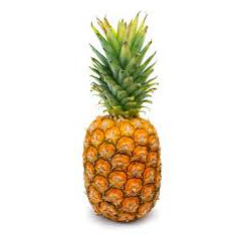

(3, 225, 225)


In [19]:
img= Image.open("C:/Users/mrall/OneDrive/Bureau/M2/Traitement image/Projet/interface/mysite/data/BD_images/Ananas_8/image081.jpg")

print(img)
def convert_image(imgreel):
    tab=np.array(imgreel)
    return tab.transpose(2,0,1)

def convert_image_back(imgreel):
    tab=np.array(imgreel)
    return tab.transpose(1,2,0)
print(np.array(img).shape)
plt.subplot(1, 2, 2)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()
print(convert_image(img).shape)



In [41]:
import os
import mysite.polls.couleurs_convert as convert
import json
def get_images_from_directories():
    base_dir = os.path.join('mysite', 'data', 'BD_images')  # Chemin vers le répertoire contenant les images
    image_files = []

    # Parcourir le répertoire et ses sous-répertoires
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # Vérifier si le fichier est une image (par exemple .jpg, .png, etc.)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                image_path = os.path.join(root, file)
                image_files.append(image_path)

    return image_files


liste = []

for x in get_images_from_directories():
    y = Image.open(x)
    yarray = np.array(y)
    if y.format == 'PNG' and yarray.ndim ==2 :
        y=y.convert('RGB')

    liste.append(y)
for i in range(len(liste)):
    if np.array(liste[i]).ndim == 3 and np.array(liste[i]).shape[2] == 4 :
        print(np.array(liste[i]).shape)
        print(np.array(liste[i]))
        print(get_images_from_directories()[i])
    
    
            

"""
def calculs(liste):
    images = [Image.open(image_path) for image_path in liste]
    espaces= list(map(convert.convert_image ,images))
    realIMGS = list(map(convert.rgb_2_grayUNI , espaces))
    vecteurs = [histogramme(x,density=True) for x in realIMGS]
    data = {nom_image: vecteur for nom_image, vecteur in zip(images, vecteurs)}
    
    # Générer le fichier JSON
    with open('histNGnorm.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)
    
    print("Le fichier JSON a été créé avec succès.")

calculs(get_images_from_directories())
"""

(1161, 1203, 4)
[[[  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 ...

 [[187 239  98 255]
  [188 240  98 255]
  [188 240  98 255]
  ...
  [188 240  98 255]
  [188 240  98 255]
  [188 240  98 255]]

 [[182 230 102 253]
  [187 239  98 255]
  [188 239  98 255]
  ...
  [188 240  98 255]
  [188 240  98 255]
  [188 240  98 255]]

 [[171 211 109 250]
  [180 226 103 253]
  [184 232  99 254]
  ...
  [188 240  98 255]
  [188 240  98 255]
  [188 240  98 255]]]
mysite\data\BD_images\Mococos_27\image274.png
(891, 891, 4)
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0

'\ndef calculs(liste):\n    images = [Image.open(image_path) for image_path in liste]\n    espaces= list(map(convert.convert_image ,images))\n    realIMGS = list(map(convert.rgb_2_grayUNI , espaces))\n    vecteurs = [histogramme(x,density=True) for x in realIMGS]\n    data = {nom_image: vecteur for nom_image, vecteur in zip(images, vecteurs)}\n    \n    # Générer le fichier JSON\n    with open(\'histNGnorm.json\', \'w\') as json_file:\n        json.dump(data, json_file, indent=4)\n    \n    print("Le fichier JSON a été créé avec succès.")\n\ncalculs(get_images_from_directories())\n'

In [ ]:

         rgb_2_grayUNI,
         rgb_2_gray601,
         rgb_2_gray709,
       : rgb_2_yiq,
       : rgb_2_yuv,
       : rgb_to_I1I2I3,
         RGB_to_NormalizedRGB,
       : RGB_to_HSV,
       : RGB_to_HSL,
       : RGB_to_LAB,
       : RGB_to_LUV,
       : RGB_to_CMYK,